# Imports & Read Data

In [1]:
import os
os.chdir('..')
from src.feature_engineering import freture_extract_All
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Show more columns
pd.set_option('display.max_columns', None) 

# Show more rows
pd.set_option('display.max_rows', 100) 

In [2]:
df = freture_extract_All()
df

,member_id,churn,outreach,months_in_app,title_Cardio workouts,title_Cardiometabolic health,title_Cholesterol friendly foods,title_Diabetes management,title_Exercise routines,title_HbA1c targets,title_Healthy eating guide,title_High-fiber meals,title_Hypertension basics,title_Lowering blood pressure,title_Meditation guide,title_Mediterranean diet,title_Restorative sleep tips,title_Sleep hygiene,title_Strength training basics,title_Stress reduction,title_Weight management,total_visits,app_usage,icd_code_A09,icd_code_B34.9,icd_code_E11.9,icd_code_H10.9,icd_code_I10,icd_code_J00,icd_code_K21.9,icd_code_M54.5,icd_code_R51,icd_code_Z71.3,code_count,priority_condition_count
0,1,0,0,13,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,0.0,0.0,1.0,0.0,1.0,4.0,0.0,1.0,0.0,2.0,9.0,4.0
1,2,0,0,2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,9.0,10.0,0.0,0.0,3.0,0.0,2.0,0.0,1.0,0.0,1.0,2.0,9.0,7.0
2,3,0,0,8,3.0,1.0,1.0,0.0,3.0,1.0,0.0,1.0,1.0,2.0,3.0,3.0,3.0,1.0,0.0,0.0,0.0,52.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,4.0,1.0
3,4,1,0,13,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,15.0,10.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,5.0,3.0
4,5,0,1,14,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,11.0,10.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,7.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,0,0,8,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,18.0,8.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,9.0,4.0
9996,9997,0,0,15,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,8.0,11.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0,3.0
9997,9998,0,0,8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,12.0,0.0,2.0,0.0,2.0,0.0,4.0,2.0,1.0,1.0,2.0,14.0,2.0
9998,9999,0,0,16,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,36.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,3.0,6.0,3.0


## Visualize pattern of churn

[Text(0, 0, '0.21'), Text(0, 0, '0.19')]

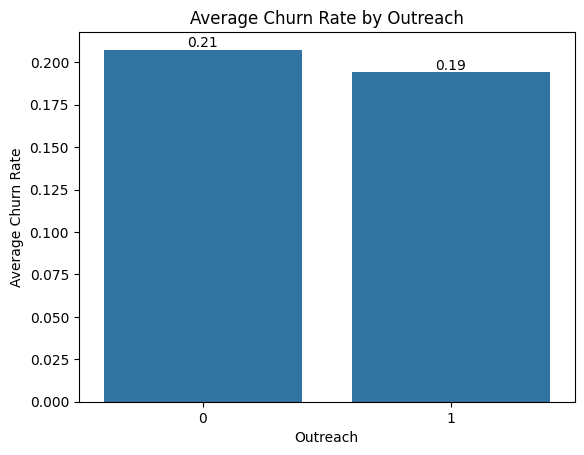

In [3]:
outreach_effect = df.groupby('outreach').agg({'churn': 'mean'}).reset_index()
ax = sns.barplot(data=outreach_effect, x='outreach', y='churn')
ax.set_xlabel('Outreach')
ax.set_ylabel('Average Churn Rate')
ax.set_title('Average Churn Rate by Outreach')
ax.bar_label(ax.containers[0], fmt='%.2f')

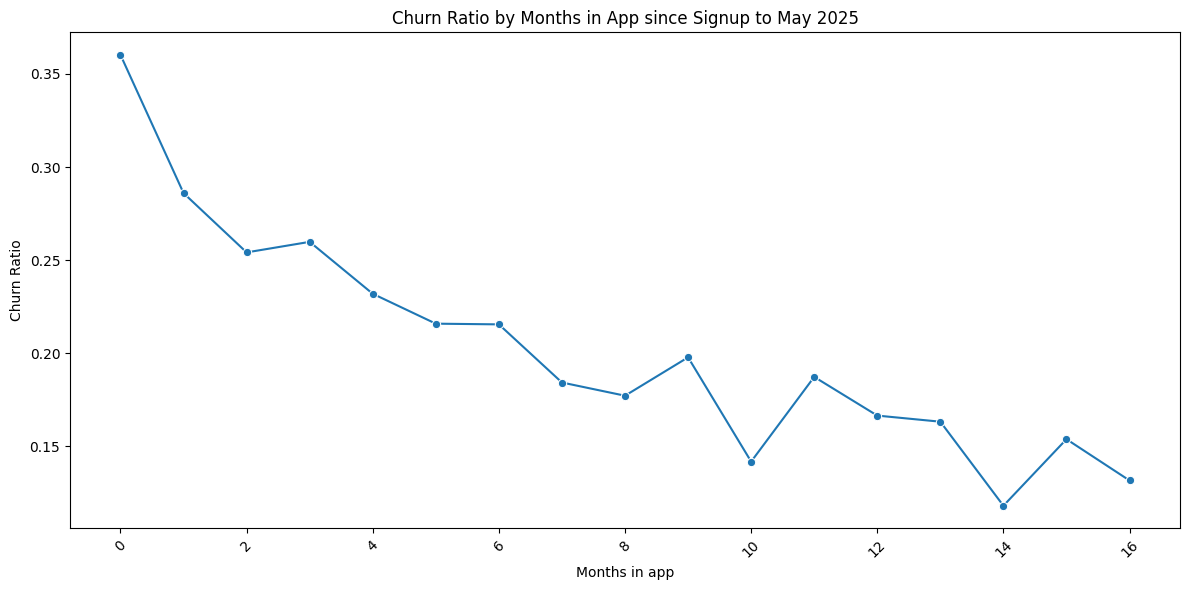

In [4]:
# Calculate churn ratio by year-month
churn_by_month = df.groupby('months_in_app').agg(
    churn_ratio=('churn', 'mean'),
    total_members=('member_id', 'count')
).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=churn_by_month, x='months_in_app', y='churn_ratio', marker='o')
plt.xticks(rotation=45)
plt.title('Churn Ratio by Months in App since Signup to May 2025')
plt.ylabel('Churn Ratio')
plt.xlabel('Months in app')
plt.tight_layout()
plt.show()

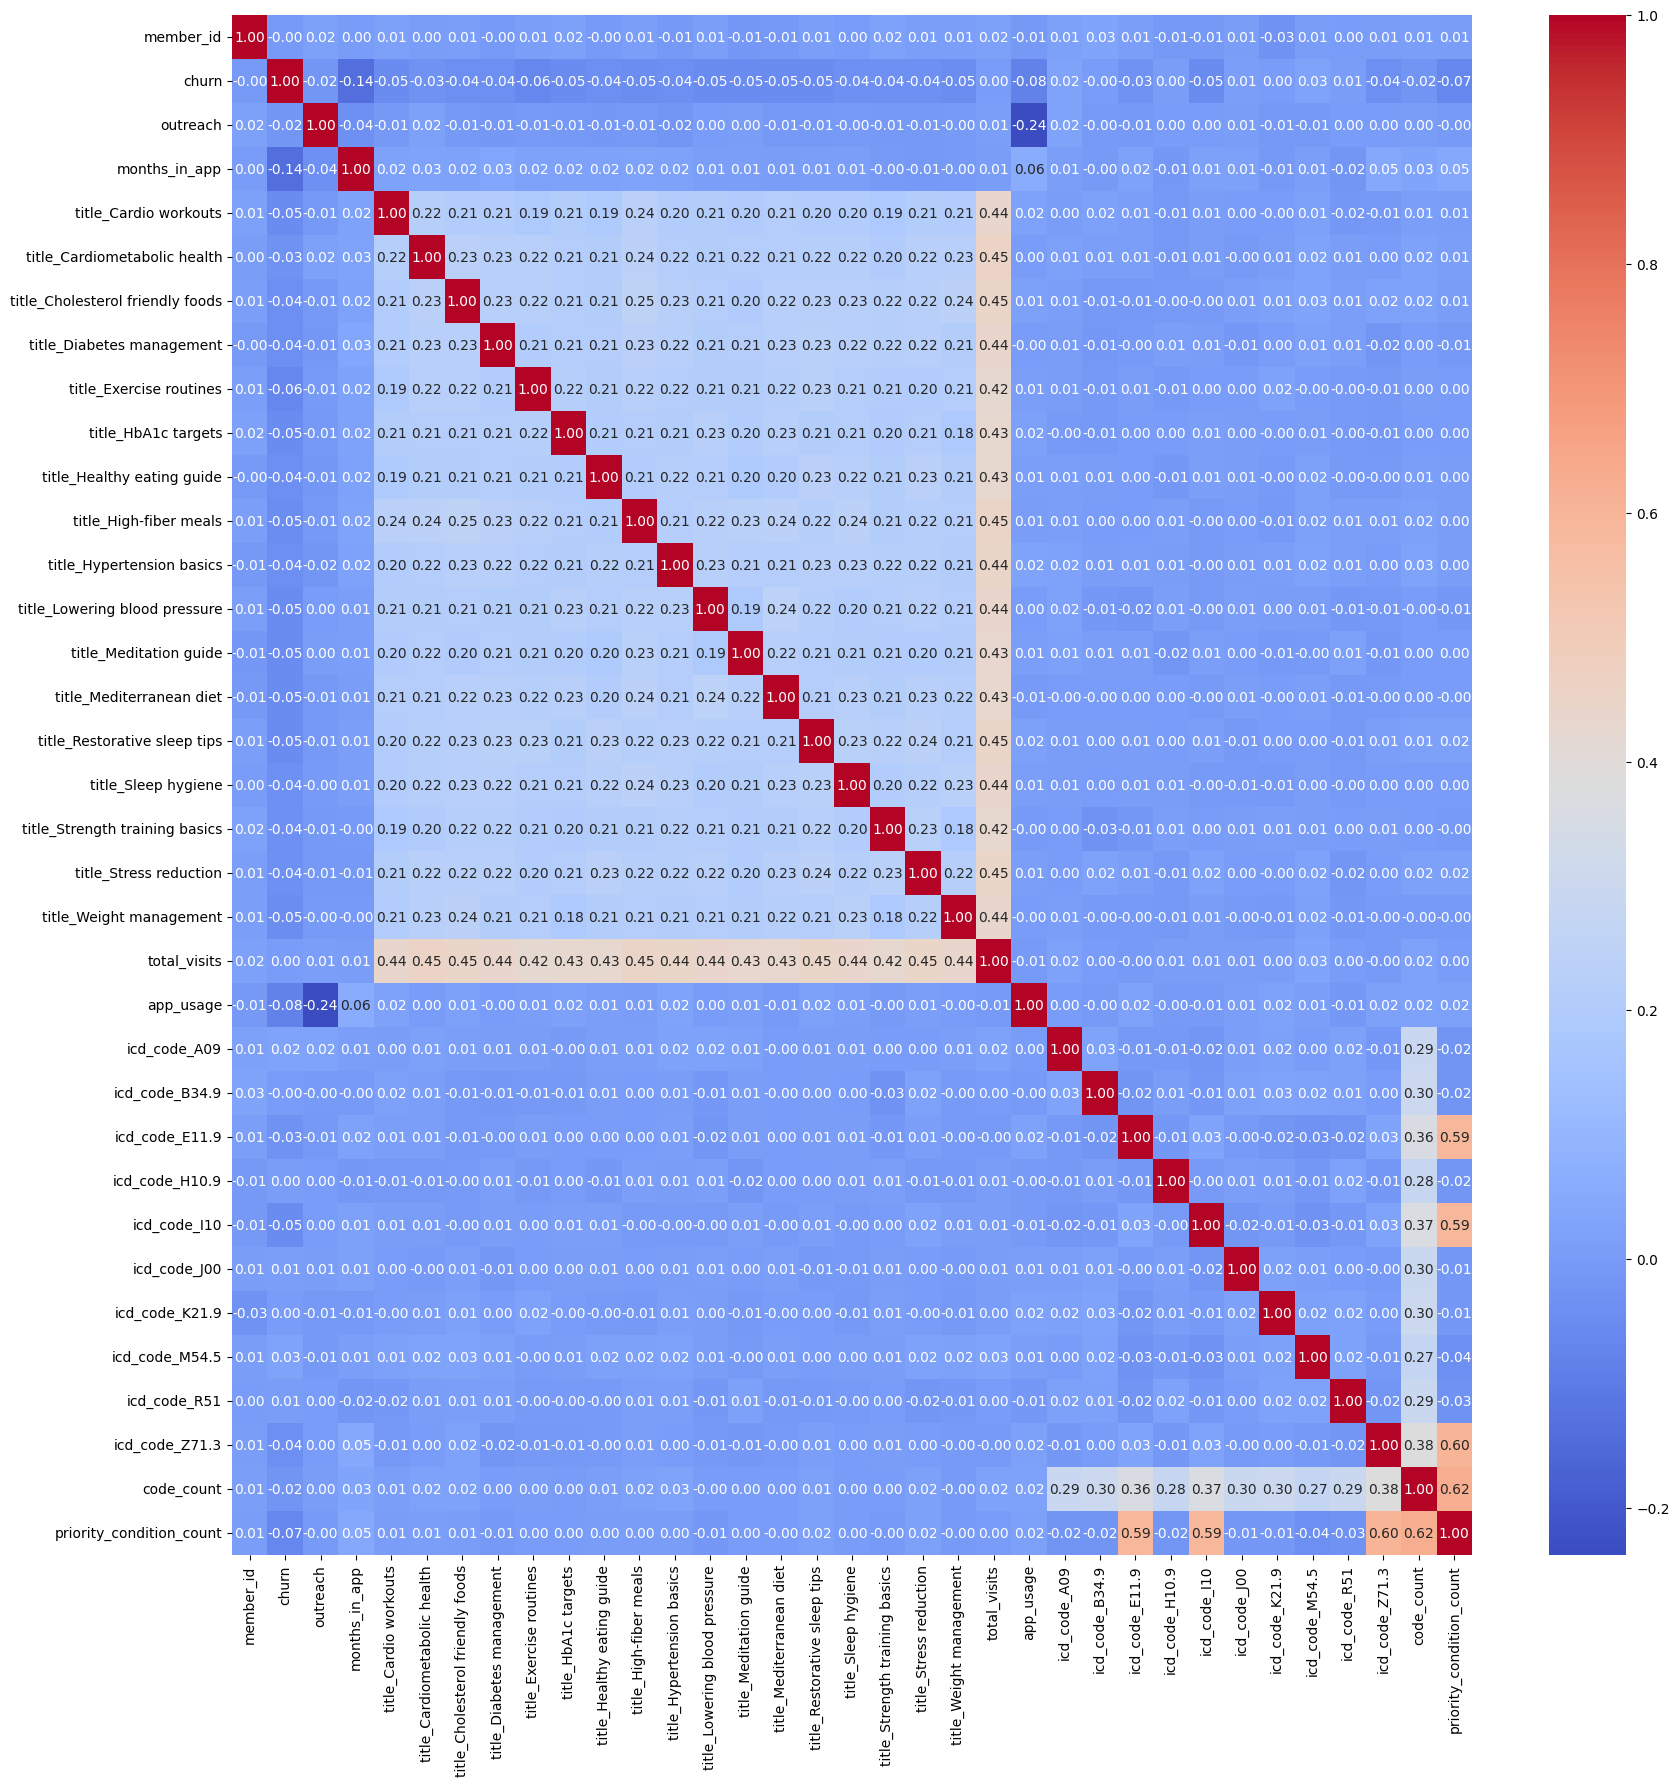

In [5]:
plt.figure(figsize=(20, 20))  # width, height in inches
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

## explore app usage

In [127]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\omerg\AppData\Local\Temp\ipykernel_242356\2637039069.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_ranges = df.groupby('usage_bin')['usage_interval'].first()
C:\Users\omerg\AppData\Local\Temp\ipykernel_242356\2637039069.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_usage = df.groupby(['usage_bin', 'outreach']).agg(


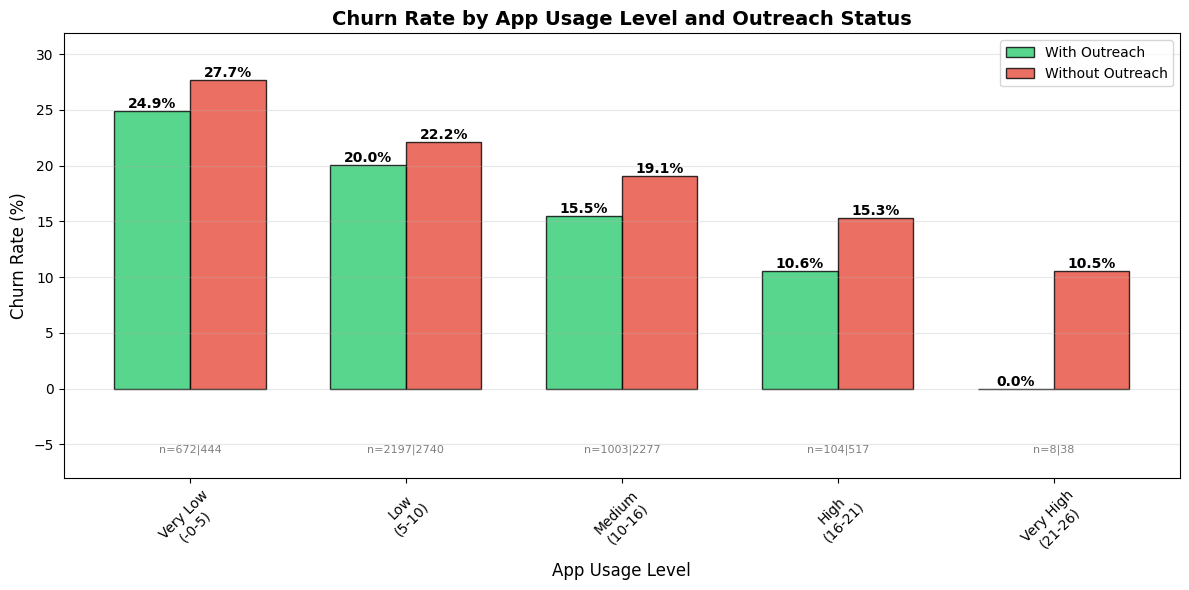

In [7]:
# Create bins and get the intervals
df['usage_bin'] = pd.cut(df['app_usage'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df['usage_interval'] = pd.cut(df['app_usage'], bins=5)

# Create a mapping of labels to their actual ranges
bin_ranges = df.groupby('usage_bin')['usage_interval'].first()
usage_labels_with_ranges = [f"{label}\n({interval.left:.0f}-{interval.right:.0f})" 
                             for label, interval in bin_ranges.items()]

churn_by_usage = df.groupby(['usage_bin', 'outreach']).agg(
    churn_rate=('churn', 'mean'),
    member_count=('member_id', 'count')
).reset_index()

churn_by_usage['churn_rate'] = churn_by_usage['churn_rate'] * 100

with_outreach = churn_by_usage[churn_by_usage['outreach'] == True]
without_outreach = churn_by_usage[churn_by_usage['outreach'] == False]

x = np.arange(len(with_outreach))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width/2, with_outreach['churn_rate'], width, 
               label='With Outreach', color='#2ecc71', edgecolor='black', alpha=0.8)
bars2 = ax.bar(x + width/2, without_outreach['churn_rate'], width,
               label='Without Outreach', color='#e74c3c', edgecolor='black', alpha=0.8)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

for i in range(len(x)):
    count_with = with_outreach.iloc[i]['member_count']
    count_without = without_outreach.iloc[i]['member_count']
    ax.text(i, -5, f'n={count_with}|{count_without}', 
            ha='center', va='top', fontsize=8, color='gray')

ax.set_xlabel('App Usage Level', fontsize=12)
ax.set_ylabel('Churn Rate (%)', fontsize=12)
ax.set_title('Churn Rate by App Usage Level and Outreach Status', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(usage_labels_with_ranges)  # Use labels with ranges
ax.set_ylim(bottom=-8, top=max(churn_by_usage['churn_rate']) * 1.15)
ax.legend()
plt.xticks(rotation=45)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Conclusions from data:

* The time window of the activity recording data is 2 weeks from 2025-07-01 to 2025-07-14.
* The signup to the aplication is between 2024-01-01 and 2025-05-31. all the useres are regestered at least one month to the app.
* New users are more likly to churn.
* High usage client are less likely to churn and more effected from outreach. 
* The strongest correlation between churn and time in app. Explore more features are needed.